# Smart Retail Customer Purchase Analysis and Prediction

In [1]:


#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Shehan\Downloads\OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data Cleaning

### 1. Remove Rows with Missing Customer ID

In [3]:
#Sometimes people buy things without logging in. We don’t want those rows because we can't track who they are.
df = df.dropna(subset=['CustomerID'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 2. Remove Canceled Orders (Returns)

In [4]:
#If Quantity is negative, it means the item was returned. We’ll remove those too

df = df[df['Quantity'] > 0]


### 3.Remove Zero or Negative prices

In [5]:
#Some rows may have UnitPrice = 0 (not realistic in real shopping).

df = df[df['UnitPrice'] > 0]

### 4. Create TotalPrice Column

In [6]:
# This is how much each transaction made

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### 5. Convert invoiceData to Real Data Format

In [7]:
#This lets us group data by month/year/day later.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### 6.Remove Duplicates

In [8]:
# some times same invoice appears more than once

df = df.drop_duplicates()

### 7.Reset Index

In [9]:
# this just makes the row numbers nice and clean

df = df.reset_index(drop = True)

## Exploratory Data Analysis (EDA)

### 1.Check Top 10 countries By Revenue

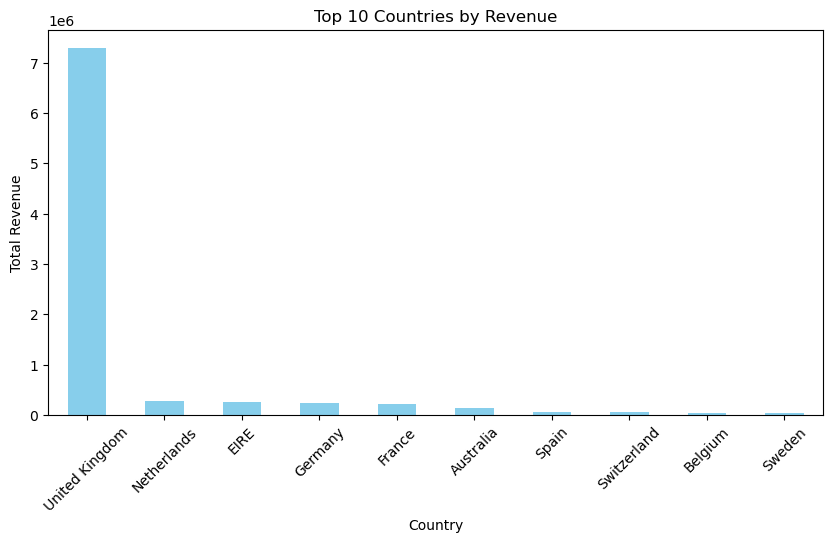

In [10]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False)
country_sales.head(10).plot(kind = 'bar', figsize = (10,5), color= 'skyblue')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation= 45)
plt.show()

### 2. Top 10 Best Selling Products

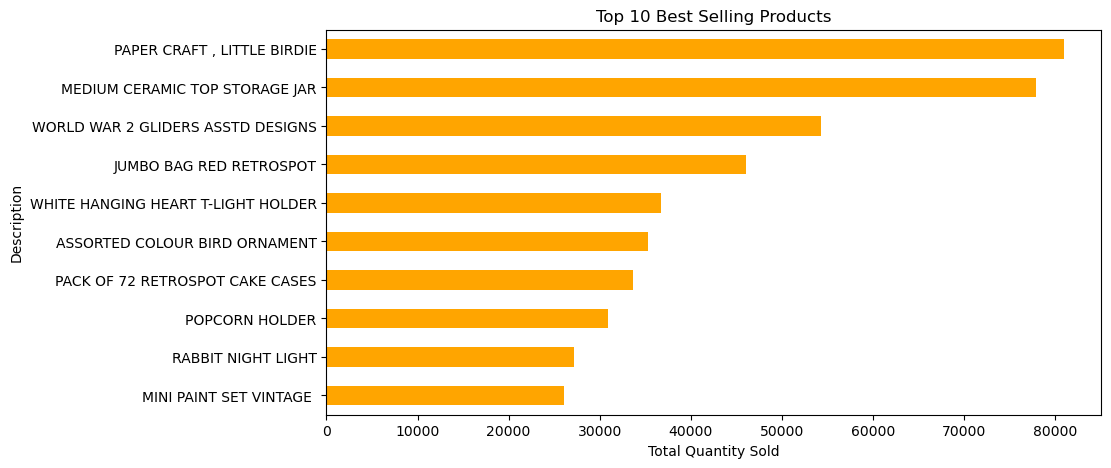

In [11]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
top_products.plot(kind = 'barh' , figsize= (10,5), color= 'orange')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

### 3.Monthly Revenue Trend

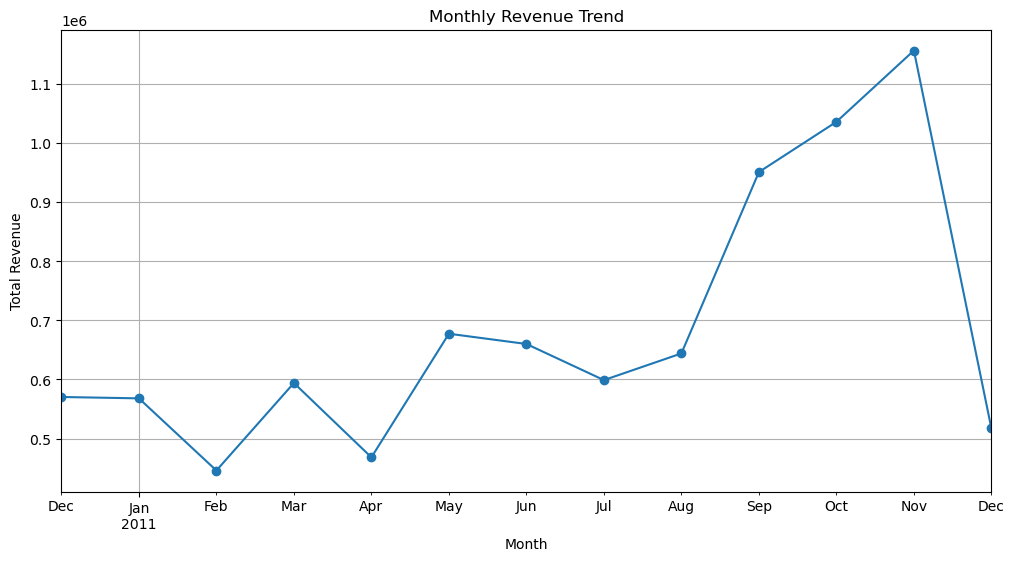

In [12]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()


### 4. Total Revenue by Day of Week

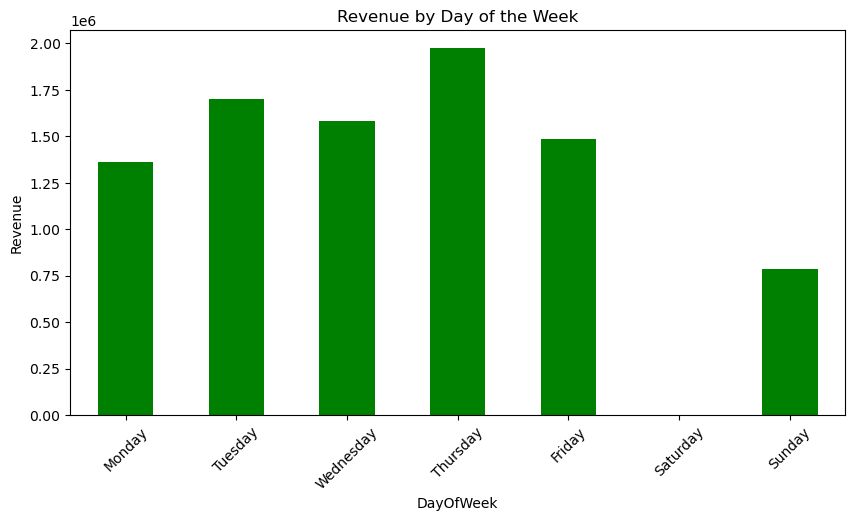

In [13]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

#order days
ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales = weekday_sales.reindex(ordered_days)

weekday_sales.plot(kind= 'bar', color ='green', figsize= (10,5))
plt.title('Revenue by Day of the Week')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

### 5. Average Spend Per Customer

In [14]:
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum()
customer_spend.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: TotalPrice, dtype: float64

### 6.Revenue Distribution (who spends more?)

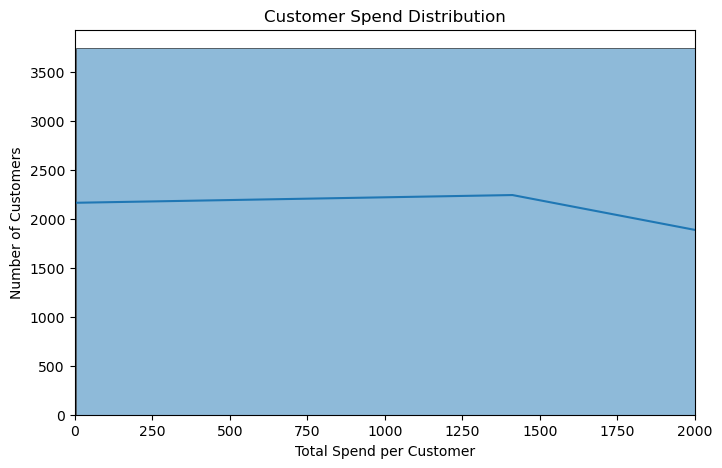

In [15]:
plt.figure(figsize= (8,5))
sns.histplot(customer_spend,bins=100, kde=True)
plt.title('Customer Spend Distribution')
plt.xlabel('Total Spend per Customer')
plt.ylabel("Number of Customers")
plt.xlim(0,2000)    #zoom for better view
plt.show()

### 7. Heatmap  how correlate each other

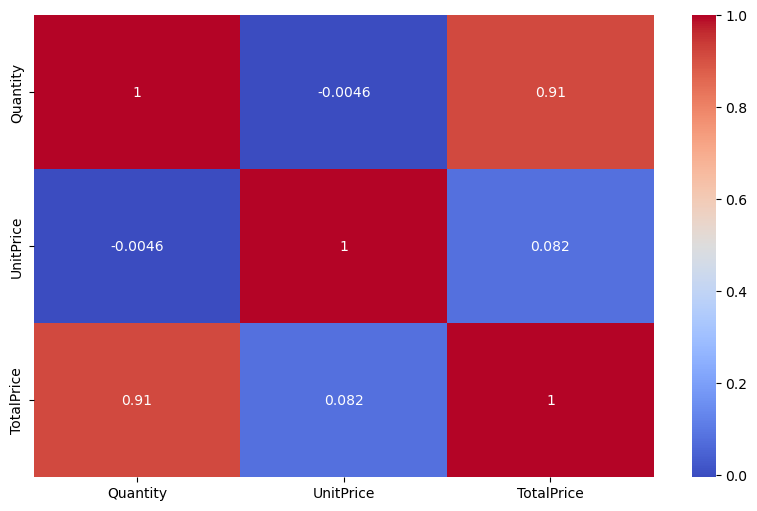

In [16]:
# how numbers relate to each other
plt.figure(figsize= (10,6))
sns.heatmap(df[['Quantity','UnitPrice','TotalPrice']].corr(),annot = True, cmap='coolwarm' )
plt.show()

# Feature Engineering and RFM Customer Segmentation.
# R-Recency-how recently a customer made a purchase
# F-Frequency- how often they purchased
# M-Monetary- how much they spent

### 1. Set a Reference Date for Today

In [17]:
import datetime as dt

#reference date - one day after the last purchase
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)


### 2. Calculate R,F,M for each Customer

In [18]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (reference_date - x.max()).days,           # Recency
    'InvoiceNo': 'nunique',                                        # Frequency
    'TotalPrice': 'sum'                                      # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm = rfm.reset_index()

### 3. Check the RFM Table

In [19]:
rfm.describe()
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### 4. Score Each R,F,M (1 to 4 )

In [20]:
rfm['R_Score'] = pd.qcut(rfm['Recency'],4 , labels=[4,3,2,1])    # lower is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'],4 , labels=[1,2,3,4])

### 5. Combine into single RFM Score

In [21]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


### 6. Segment Customers Based on Score

In [22]:
rfm['Segment'] = 'Low-Value'
rfm.loc[rfm['RFM_Score'] >= '344', 'Segment'] = 'Mid-Value'
rfm.loc[rfm['RFM_Score'] >= '444', 'Segment'] = 'High-Value'


### 7. Visualize the Segments

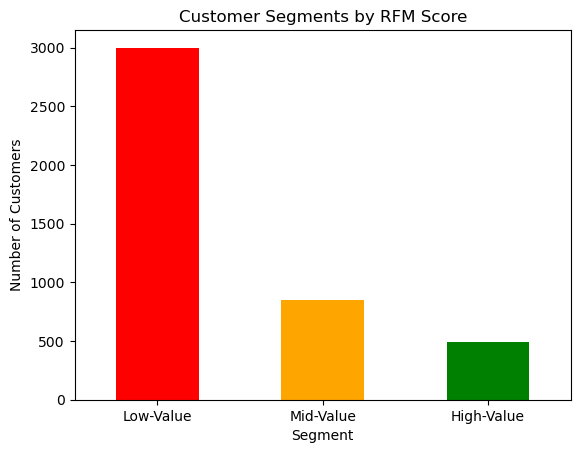

In [23]:
segment_counts = rfm['Segment'].value_counts()
segment_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Customer Segments by RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Mechine Learning

### ML Goal 1- Predict Customer Churn (yes/no) - Classification (Churn)
#### will a customer buy again in the next month?

### 1.Define a churn Label

In [24]:
# if Recency > 90 days then Churned = 1 ( they have not come back )
# else then Churned = 0

rfm['Churn'] = (rfm['Recency'] > 90 ).astype(int)

### 2.Select features and target

In [25]:
x = rfm[['Recency', 'Frequency','Monetary']]
y = rfm['Churn']

### 3. Train/Test Split

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42 )

### 4. Train a Model (Random Forest ) 

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

### 5.Evaluate the Model

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[561   0]
 [  0 307]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       307

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



### ML Goal 2- Predict Future Spend ( Regression)
#### how much money will customer spend next month?

### 1. Define Features and Target

In [29]:
X = rfm[['Recency', 'Frequency']]
y = rfm['Monetary']


### 2.Train/Test Split and Model

In [33]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

### 3.Evaluate

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = reg.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 2.4808767431576375e-12
RMSE: 5.749245475611521e-12
